In [1]:
import sys
sys.path.append('../')  # To ensure utils can be imported if needed

%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import os

with open("../data/eval_results/grow/probe_evaluated/test_100_depth_4_llama-3.2-1b.pkl", "rb") as f:
    data_1b = pickle.load(f)
    
with open("../data/eval_results/grow/probe_evaluated/test_100_depth_4_llama-3.2-3b.pkl", "rb") as f:
    data_3b = pickle.load(f)

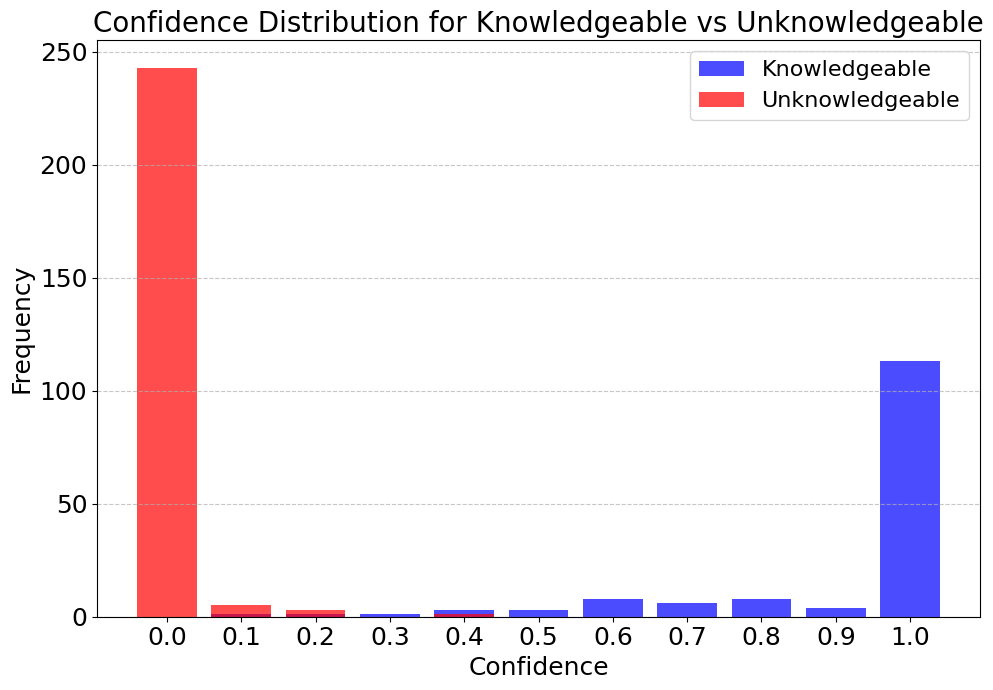

In [3]:
import numpy as np
import matplotlib.pyplot as plt

knowledgable_confidence = []
unknowledgable_confidence = []

for item in data_1b:
    if item['knowledgable']:
        knowledgable_confidence.append(item['knowledge_confidence'])
    else:
        unknowledgable_confidence.append(item['knowledge_confidence'])

# --- Solution for discrete bins ---
# Your discrete values are 0, 0.1, 0.2, ..., 1.0 (11 distinct values).
# To center histogram bars on these values, we need bin edges halfway between them.
# For a value 'v', the bin should span from 'v - 0.05' to 'v + 0.05'.
# So, the edges will be: -0.05, 0.05, 0.15, ..., 0.95, 1.05.
# This creates 11 bins, each 0.1 wide.
bin_edges = np.arange(-0.05, 1.15, 0.1)
# print(f"Bin edges: {bin_edges}") # For verification: [-0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05]

plt.figure(figsize=(10, 7)) # Adjusted figure size for better readability

# Plot histogram for 'knowledgable_confidence'
plt.hist(knowledgable_confidence,
         bins=bin_edges,          # Use the custom bin edges
         alpha=0.7,               # Transparency
         label='Knowledgeable',
         color='blue',
         rwidth=0.8)              # Reduce bar width slightly to create small gaps if desired

# Plot histogram for 'unknowledgable_confidence'
plt.hist(unknowledgable_confidence,
         bins=bin_edges,          # Use the same custom bin edges
         alpha=0.7,               # Transparency
         label='Unknowledgeable',
         color='red',
         rwidth=0.8)              # Reduce bar width slightly

plt.title('Confidence Distribution for Knowledgeable vs Unknowledgeable', fontsize=20)
plt.xlabel('Confidence', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
# Tick font size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Set x-axis ticks to be the center of the bins (your discrete values)
tick_centers = np.arange(0, 1.1, 0.1) # These are your actual discrete values: [0.  0.1 0.2 ... 1. ]
plt.xticks(tick_centers, [f"{x:.1f}" for x in tick_centers]) # Format ticks to one decimal place

plt.legend(loc='upper right', fontsize=16) # Legend for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for easier frequency reading
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show()

In [15]:
import pickle

# model_size = "1b"
model_size = "3b"

with open(f"../data/eval_results/grow/injection_evaluated/original_100_depth_4_llama-3.2-{model_size}_1.pkl", "rb") as f:
    original_data = pickle.load(f)

with open(f"../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-{model_size}_1.pkl", "rb") as f:
    base_data_1 = pickle.load(f)

with open(f"../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-{model_size}_10.pkl", "rb") as f:
    base_data_10 = pickle.load(f)

with open(f"../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-{model_size}_100.pkl", "rb") as f:
    base_data_100 = pickle.load(f)

In [11]:
def is_answer_correct(item):
    return item["final_answer_correct"]

def is_reasoning_correct(item):
    return all([k['nli_class'] == 'entailment' for k in item['required_knowledge']])

def is_correct(item):
    return is_answer_correct(item) and is_reasoning_correct(item)

In [16]:
print("Original Accuracy:", sum([is_correct(item) for item in original_data]) / len(original_data), sum([is_answer_correct(item) for item in original_data]) / len(original_data), sum([is_reasoning_correct(item) for item in original_data]) / len(original_data), sum([item['final_answer_correct'] for item in original_data]) / len(original_data))
print("Base 1 Accuracy:", sum([is_correct(item) for item in base_data_1]) / len(base_data_1), sum([is_answer_correct(item) for item in base_data_1]) / len(base_data_1), sum([is_reasoning_correct(item) for item in base_data_1]) / len(base_data_1), sum([item['final_answer_correct'] for item in base_data_1]) / len(base_data_1))
print("Base 10 Accuracy:", sum([is_correct(item) for item in base_data_10]) / len(base_data_10), sum([is_answer_correct(item) for item in base_data_10]) / len(base_data_10), sum([is_reasoning_correct(item) for item in base_data_10]) / len(base_data_10), sum([item['final_answer_correct'] for item in base_data_10]) / len(base_data_10))
print("Base 100 Accuracy:", sum([is_correct(item) for item in base_data_100]) / len(base_data_100), sum([is_answer_correct(item) for item in base_data_100]) / len(base_data_100), sum([is_reasoning_correct(item) for item in base_data_100]) / len(base_data_100), sum([item['final_answer_correct'] for item in base_data_100]) / len(base_data_100))

Original Accuracy: 0.0 0.08 0.0 0.08
Base 1 Accuracy: 0.44 0.69 0.46 0.69
Base 10 Accuracy: 0.32 0.59 0.39 0.59
Base 100 Accuracy: 0.38 0.62 0.41 0.62



Processing model size: 1b
Attempting to load: ../data/eval_results/grow/injection_evaluated/original_100_depth_4_llama-3.2-1b_1.pkl
Successfully processed ../data/eval_results/grow/injection_evaluated/original_100_depth_4_llama-3.2-1b_1.pkl. Counts: {'AC_KE': 0, 'AC_KNE': 8, 'AW_KE': 0, 'AW_KNE': 92}
Attempting to load: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_1.pkl
Successfully processed ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_1.pkl. Counts: {'AC_KE': 9, 'AC_KNE': 33, 'AW_KE': 12, 'AW_KNE': 46}
Attempting to load: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_10.pkl
Successfully processed ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_10.pkl. Counts: {'AC_KE': 3, 'AC_KNE': 12, 'AW_KE': 12, 'AW_KNE': 73}
Attempting to load: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_100.pkl
Successfully processed ../data/eval_results/grow/in

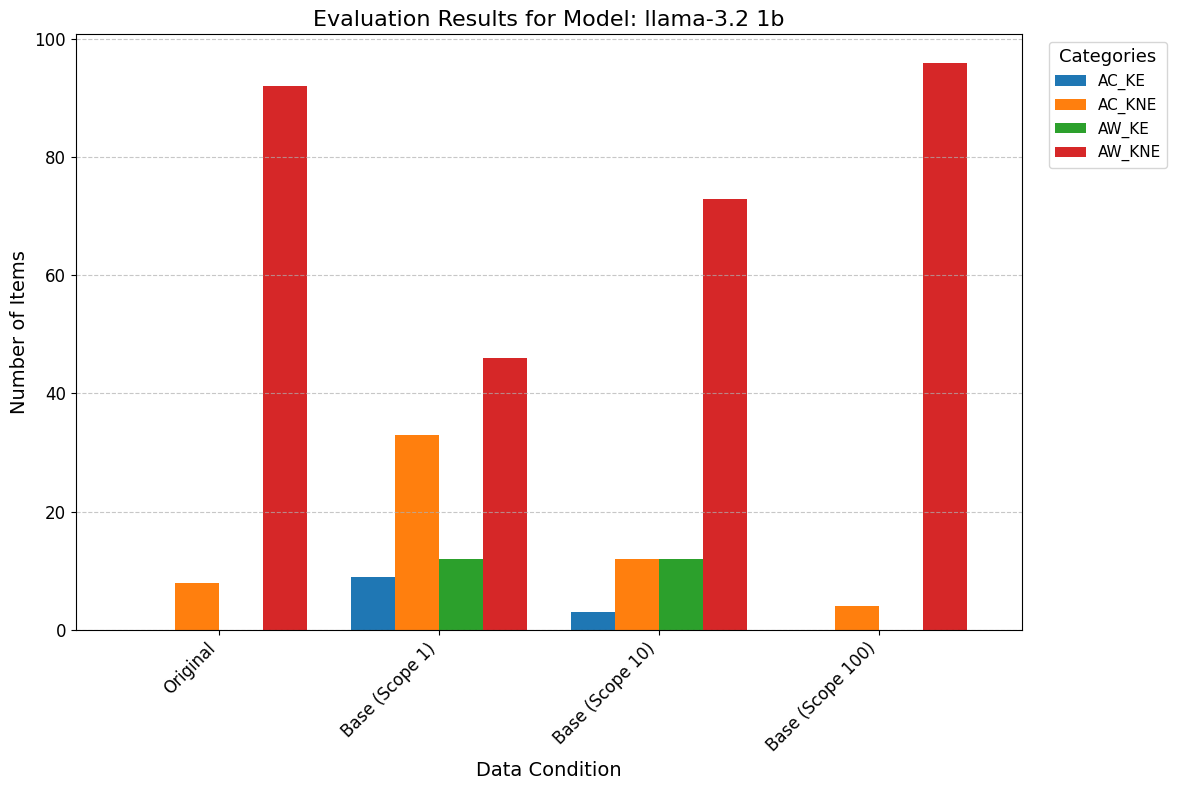

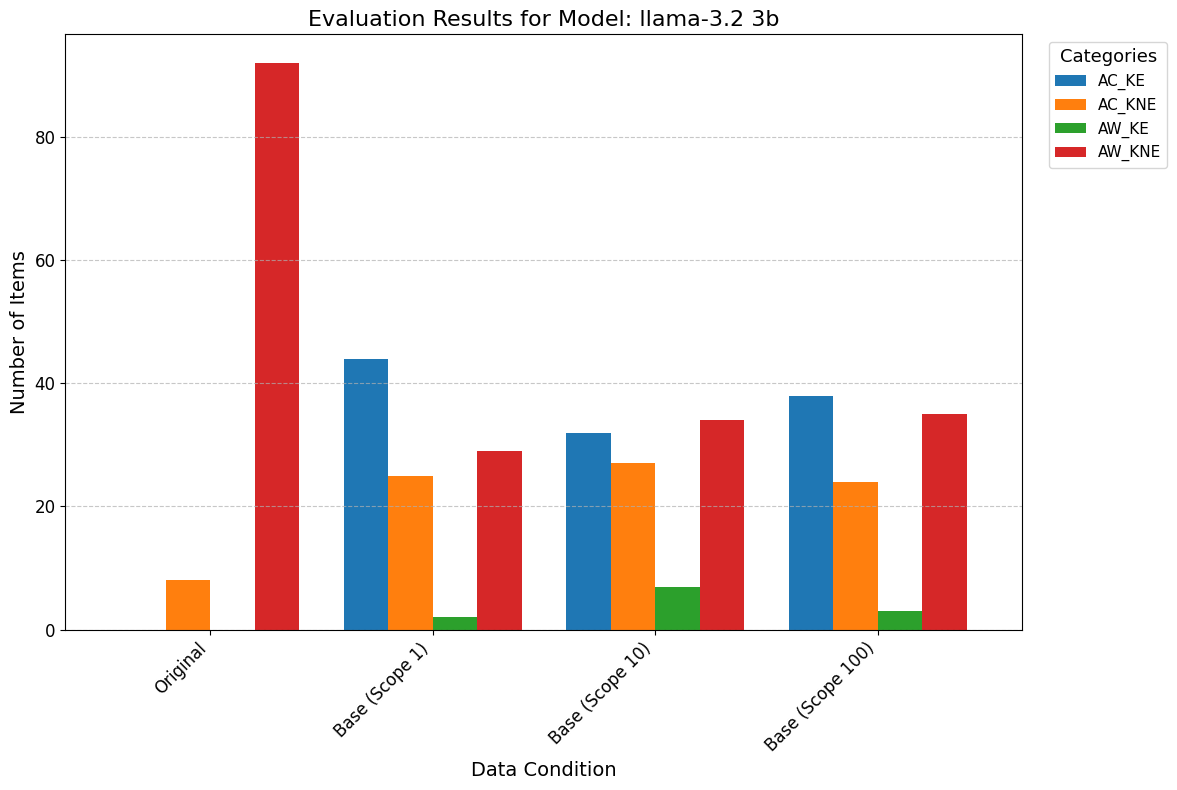

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

def get_category_counts(data_list, is_answer_correct_func, is_reasoning_correct_func):
    counts = {
        "AC_KE": 0,  # Answer Correct, Reasoning Correct
        "AC_KNE": 0,  # Answer Correct, Reasoning Wrong
        "AW_KE": 0, # Answer Incorrect, Reasoning Correct
        "AW_KNE": 0  # Answer Incorrect, Reasoning Incorrect
    }
    if not data_list: 
        return counts
        
    for item in data_list:
        if not isinstance(item, dict):
            print(f"Warning: Skipping item that is not a dictionary: {item}")
            continue

        ans_correct = is_answer_correct_func(item)
        reas_correct = is_reasoning_correct_func(item)

        if ans_correct and reas_correct:
            counts["AC_KE"] += 1
        elif ans_correct and not reas_correct:
            counts["AC_KNE"] += 1
        elif not ans_correct and reas_correct:
            counts["AW_KE"] += 1
        elif not ans_correct and not reas_correct:
            counts["AW_KNE"] += 1
    return counts

model_sizes = ["1b", "3b"]
all_plot_data = {} 

base_file_dir = "../data/eval_results/grow/injection_evaluated/"


for model_s in model_sizes:
    model_results_for_df = []
    datasets_to_load = [
        {"label": "Original", "type": "original", "scope_suffix": "_1"},
        {"label": "Base (Scope 1)", "type": "base", "scope_suffix": "_1"},
        {"label": "Base (Scope 10)", "type": "base", "scope_suffix": "_10"},
        {"label": "Base (Scope 100)", "type": "base", "scope_suffix": "_100"},
    ]

    print(f"\nProcessing model size: {model_s}")

    for dataset_info in datasets_to_load:
        if dataset_info["type"] == "original":
            file_name = f"original_100_depth_4_llama-3.2-{model_s}{dataset_info['scope_suffix']}.pkl"
        else: 
            file_name = f"base_100_depth_4_llama-3.2-{model_s}{dataset_info['scope_suffix']}.pkl"
        
        file_path = os.path.join(base_file_dir, file_name)
        
        print(f"Attempting to load: {file_path}")
        try:
            with open(file_path, "rb") as f:
                data = pickle.load(f)
            
            if not isinstance(data, list):
                print(f"Warning: Data in {file_path} is not a list. Skipping.")
                data = [] 

            category_counts = get_category_counts(data, is_answer_correct, is_reasoning_correct)
            row = {"Data Type": dataset_info["label"], **category_counts}
            model_results_for_df.append(row)
            print(f"Successfully processed {file_path}. Counts: {category_counts}")

        except FileNotFoundError:
            print(f"Warning: File not found: {file_path}. This dataset will have zero counts.")
            row = {"Data Type": dataset_info["label"], "AC_KE": 0, "AC_KNE": 0, "AW_KE": 0, "AW_KNE": 0}
            model_results_for_df.append(row)
        except Exception as e:
            print(f"Error loading or processing {file_path}: {e}. This dataset will have zero counts.")
            row = {"Data Type": dataset_info["label"], "AC_KE": 0, "AC_KNE": 0, "AW_KE": 0, "AW_KNE": 0}
            model_results_for_df.append(row)


    if model_results_for_df:
        df = pd.DataFrame(model_results_for_df)
        all_plot_data[model_s] = df
    else:
        print(f"No data rows generated for model {model_s}.")

# Plotting
plot_files = []
for model_s, df in all_plot_data.items():
    if df.empty:
        print(f"DataFrame for model {model_s} is empty. Skipping plot.")
        continue
    
    if df[["AC_KE", "AW_KE", "AC_KNE", "AW_KNE"]].sum().sum() == 0:
        print(f"No actual data (all counts are zero) for model {model_s}. A plot with all zeros will be generated if categories exist.")

    df.set_index("Data Type", inplace=True)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    df.plot(kind='bar', ax=ax, width=0.8)
    
    plt.title(f'Evaluation Results for Model: llama-3.2 {model_s}', fontsize=16)
    plt.ylabel('Number of Items', fontsize=14)
    plt.xlabel('Data Condition', fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Categories', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

In [24]:
import pickle
from collections import defaultdict

def analyze_transitions(original_dataset, base_dataset, is_knowledgeable_filter):
    """
    Analyzes NLI label transitions between an original and a base dataset.
    Uses 'knowledgable' and 'nli_class' as keys.
    """
    transitions = {
        'entailment': defaultdict(int),
        'neutral': defaultdict(int),
        'contradiction': defaultdict(int),
        'unknown_original_label': defaultdict(int) 
    }
    possible_nli_labels = ['entailment', 'neutral', 'contradiction']

    if not original_dataset or not base_dataset:
        return transitions

    num_items = min(len(original_dataset), len(base_dataset))

    for i in range(num_items):
        item_orig = original_dataset[i]
        item_base = base_dataset[i]

        # Using 'required_knowledge' as per the initial problem description
        if 'required_knowledge' not in item_orig or 'required_knowledge' not in item_base:
            continue
            
        facts_orig = item_orig['required_knowledge']
        facts_base = item_base['required_knowledge']
        
        num_facts = min(len(facts_orig), len(facts_base))

        for j in range(num_facts):
            fact_orig = facts_orig[j]
            fact_base = facts_base[j]

            # MODIFIED KEYS HERE:
            if 'knowledgable' not in fact_orig or 'nli_class' not in fact_orig or 'nli_class' not in fact_base:
                # print(f"Warning: Missing 'knowledgable' or 'nli_class' in fact {j} of item {i}. Skipping fact.")
                continue

            # MODIFIED KEY HERE:
            if fact_orig['knowledgable'] == is_knowledgeable_filter:
                # MODIFIED KEYS HERE:
                original_nli = str(fact_orig['nli_class']).lower()
                base_nli = str(fact_base['nli_class']).lower()

                if original_nli in transitions:
                    transitions[original_nli][base_nli] += 1
                else:
                    transitions['unknown_original_label'][base_nli] += 1
                    if original_nli not in possible_nli_labels and original_nli != 'unknown_original_label':
                        # print(f"Warning: Encountered unexpected original NLI label '{original_nli}' (from 'nli_class') for fact {j} item {i}. Counted under 'unknown_original_label'.")
                        pass
                
                if base_nli not in possible_nli_labels and not any(char.isdigit() for char in base_nli):
                    # print(f"Info: Encountered base NLI label '{base_nli}' (from 'nli_class') not in {possible_nli_labels} for fact {j} item {i}. Original label was '{original_nli}'.")
                    pass

    return transitions

def merge_transition_dicts(agg_dict, new_dict):
    """Merges new_dict into agg_dict by summing counts."""
    for orig_label, base_label_counts in new_dict.items():
        if orig_label not in agg_dict:
            agg_dict[orig_label] = defaultdict(int)
        for base_label, count in base_label_counts.items():
            agg_dict[orig_label][base_label] += count

def print_transition_results(results, category_name_prefix, aggregated_models_list, aggregated_bases_list):
    """Prints the grand aggregated transition results."""
    full_category_name = f"{category_name_prefix} (Models: {', '.join(aggregated_models_list) if aggregated_models_list else 'None'}, Bases: {', '.join(aggregated_bases_list) if aggregated_bases_list else 'None'})"
    print(f"\n--- {full_category_name} ---")
    
    total_facts_in_category = 0
    found_data = False

    sorted_orig_labels = sorted(results.keys())

    for original_label in sorted_orig_labels:
        base_labels = results[original_label]
        if original_label == 'unknown_original_label' and not base_labels:
            continue
        
        current_label_total = sum(base_labels.values())
        if current_label_total > 0 or (original_label == 'unknown_original_label' and base_labels):
            found_data = True
            print(f"  From Original {original_label.capitalize()}:")
            for base_label, count in sorted(base_labels.items()):
                if count > 0:
                    print(f"    To Base {base_label.capitalize()}: {count}")
            if current_label_total > 0:
                 print(f"    Subtotal from Original {original_label.capitalize()}: {current_label_total}")
            total_facts_in_category += current_label_total
    
    if not found_data:
        print("    No facts found matching this category's criteria across all aggregated datasets.")
    else:
        print(f"  GRAND TOTAL facts considered in this category: {total_facts_in_category}")
    print("--------------------------------------------------")

# --- Main script ---

# STEP 1: Define model sizes and file structures
model_sizes_to_process = ["1b", "3b"]
all_loaded_data = {} 

data_file_structure = {
    "original": ("original_100_depth_4_llama-3.2-{model_size}_1.pkl", "original"),
    "base_1": ("base_100_depth_4_llama-3.2-{model_size}_1.pkl", "base_1"),
    "base_10": ("base_100_depth_4_llama-3.2-{model_size}_10.pkl", "base_10"),
    "base_100": ("base_100_depth_4_llama-3.2-{model_size}_100.pkl", "base_100")
}
base_path = "../data/eval_results/grow/injection_evaluated/" # Ensure this path is correct

print("--- Starting Data Loading ---")
successfully_loaded_models = []
for model_size in model_sizes_to_process:
    current_model_data = {}
    all_files_for_model_loaded = True
    for key_type, (name_template, data_key_in_dict) in data_file_structure.items():
        file_path = base_path + name_template.format(model_size=model_size)
        try:
            with open(file_path, "rb") as f:
                current_model_data[data_key_in_dict] = pickle.load(f)
            print(f"Successfully loaded: {file_path}")
        except FileNotFoundError:
            print(f"ERROR: File not found for model {model_size}, type {data_key_in_dict}: {file_path}.")
            all_files_for_model_loaded = False
            break 
        except Exception as e:
            print(f"ERROR loading file {file_path}: {e}.")
            all_files_for_model_loaded = False
            break
    
    if all_files_for_model_loaded:
        all_loaded_data[model_size] = current_model_data
        successfully_loaded_models.append(model_size)
    else:
        print(f"Model {model_size} will be SKIPPED for aggregation due to missing/corrupt files.")

if not successfully_loaded_models:
    print("\nNo data loaded successfully for ANY model. Exiting.")
    exit()
else:
    print(f"\n--- Data loading complete. Aggregating for models: {', '.join(successfully_loaded_models)} ---")

# STEP 2: Initialize Grand Aggregated Transition Counters
grand_aggregated_knowledgeable_transitions = {
    'entailment': defaultdict(int), 'neutral': defaultdict(int), 
    'contradiction': defaultdict(int), 'unknown_original_label': defaultdict(int)
}
grand_aggregated_unknowledgeable_transitions = {
    'entailment': defaultdict(int), 'neutral': defaultdict(int), 
    'contradiction': defaultdict(int), 'unknown_original_label': defaultdict(int)
}

base_data_keys_to_aggregate = ["base_1", "base_10", "base_100"] 
original_data_key = "original" 

# STEP 3: Perform Grand Aggregation
print("\n--- Starting Grand Aggregation Process ---")
for model_size in successfully_loaded_models:
    print(f"Processing model: {model_size}")
    if original_data_key not in all_loaded_data[model_size]:
        print(f"  Skipping model {model_size} as its original data ('{original_data_key}') is missing from loaded set.")
        continue
    current_original_data = all_loaded_data[model_size][original_data_key]

    for base_key in base_data_keys_to_aggregate:
        if base_key not in all_loaded_data[model_size]:
            print(f"  Skipping base dataset '{base_key}' for model {model_size} as it's missing from loaded set.")
            continue
        print(f"  Aggregating Original vs. {base_key} for model {model_size}")
        current_base_data = all_loaded_data[model_size][base_key]

        knowledgeable_segment = analyze_transitions(
            current_original_data, current_base_data, is_knowledgeable_filter=True
        )
        merge_transition_dicts(grand_aggregated_knowledgeable_transitions, knowledgeable_segment)

        unknowledgeable_segment = analyze_transitions(
            current_original_data, current_base_data, is_knowledgeable_filter=False
        )
        merge_transition_dicts(grand_aggregated_unknowledgeable_transitions, unknowledgeable_segment)
    print(f"Finished processing for model: {model_size}")


# STEP 4: Print Grand Aggregated Results
print(f"\n\n==============================================================")
print(f"GRAND AGGREGATED RESULTS")
print(f"==============================================================")

print_transition_results(grand_aggregated_knowledgeable_transitions,
                         "All 'Knowledgable' Facts - Aggregated", # Updated term
                         successfully_loaded_models,
                         base_data_keys_to_aggregate)

print_transition_results(grand_aggregated_unknowledgeable_transitions,
                         "All 'Unknowledgable' Facts - Aggregated", # Updated term
                         successfully_loaded_models,
                         base_data_keys_to_aggregate)

print("\n\n--- Grand Aggregation Complete ---")

--- Starting Data Loading ---
Successfully loaded: ../data/eval_results/grow/injection_evaluated/original_100_depth_4_llama-3.2-1b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_10.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_100.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/original_100_depth_4_llama-3.2-3b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-3b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-3b_10.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-3b_100.pkl

--- Data loading complete. Aggregating for models: 1b, 3b ---

--- Starting Grand Aggregation Process ---
Processing model: 1b
  Ag

In [7]:
import pickle
from collections import defaultdict

def classify_instance(item):
    """
    Classifies an instance (item) into one of three categories:
    AE (All Entailed), CP (Contradiction Present), MO (Mixed/Other).
    Uses 'nli_class' for NLI labels.
    """
    if 'required_knowledge' not in item or not item['required_knowledge']:
        # If no facts, consider it vacuously 'All Entailed' or a special category.
        # For now, AE seems reasonable as no facts violate the condition.
        return "AE"

    facts = item['required_knowledge']
    
    all_entailed = True
    has_contradiction = False

    for fact in facts:
        # Using 'nli_class' as requested
        nli_label = str(fact.get('nli_class', '')).lower()

        if nli_label == 'contradiction':
            has_contradiction = True
        
        if nli_label != 'entailment':
            all_entailed = False

    if all_entailed:
        return "AE"
    elif has_contradiction:
        return "CP"
    else:
        return "MO"

def print_instance_transition_results(transitions, aggregated_models, aggregated_bases):
    """Prints the instance-level transition matrix."""
    print(f"\n--- Instance-Level NLI Category Transitions ---")
    print(f"Aggregated for Models: {', '.join(aggregated_models) if aggregated_models else 'None'}")
    print(f"Aggregated for Base Versions: {', '.join(aggregated_bases) if aggregated_bases else 'None'}")
    print("-------------------------------------------------------------")
    
    categories = ["AE", "CP", "MO"]
    categories_desc = {
        "AE": "All Entailed",
        "CP": "Contradiction Present (and not AE)",
        "MO": "Mixed/Other (No contradictions, not AE)"
    }

    # Header
    header = f"{'From Original ↓':<20} | {'To Base →':<20} | "
    for cat in categories:
        header += f"{cat:<12} | "
    print(header.strip())
    print("-" * (len(header) -1)) # Adjust length for trailing space

    total_transitions = 0
    for orig_cat in categories:
        row_str = f"{categories_desc[orig_cat]:<20} ({orig_cat}) | "
        for base_cat in categories:
            count = transitions.get(orig_cat, {}).get(base_cat, 0)
            row_str += f"{count:<12} | "
            total_transitions += count
        print(row_str.strip())
    
    print("-" * (len(header) -1))
    print(f"Total instance comparisons considered: {total_transitions}")
    print("-------------------------------------------------------------")
    print("Category Definitions:")
    print("  AE (All Entailed): All 'required_knowledge' facts have 'nli_class' as 'entailment'.")
    print("  CP (Contradiction Present): Not AE, AND at least one fact has 'nli_class' as 'contradiction'.")
    print("  MO (Mixed/Other): Neither AE nor CP (e.g., mix of 'entailment'/'neutral', or all 'neutral').")


# --- Main script ---

# STEP 1: Define model sizes and file structures
model_sizes_to_process = ["1b", "3b"]
all_loaded_data = {} 

data_file_structure = {
    "original": ("original_100_depth_4_llama-3.2-{model_size}_1.pkl", "original"),
    "base_1": ("base_100_depth_4_llama-3.2-{model_size}_1.pkl", "base_1"),
    "base_10": ("base_100_depth_4_llama-3.2-{model_size}_10.pkl", "base_10"),
    "base_100": ("base_100_depth_4_llama-3.2-{model_size}_100.pkl", "base_100")
}
base_path = "../data/eval_results/grow/injection_evaluated/" # Ensure this path is correct

print("--- Starting Data Loading ---")
successfully_loaded_models = []
for model_size in model_sizes_to_process:
    current_model_data = {}
    all_files_for_model_loaded = True
    for key_type, (name_template, data_key_in_dict) in data_file_structure.items():
        file_path = base_path + name_template.format(model_size=model_size)
        try:
            with open(file_path, "rb") as f:
                current_model_data[data_key_in_dict] = pickle.load(f)
            print(f"Successfully loaded: {file_path}")
        except FileNotFoundError:
            print(f"ERROR: File not found for model {model_size}, type {data_key_in_dict}: {file_path}.")
            all_files_for_model_loaded = False
            break 
        except Exception as e:
            print(f"ERROR loading file {file_path}: {e}.")
            all_files_for_model_loaded = False
            break
    
    if all_files_for_model_loaded:
        all_loaded_data[model_size] = current_model_data
        successfully_loaded_models.append(model_size)
    else:
        print(f"Model {model_size} will be SKIPPED for aggregation due to missing/corrupt files.")

if not successfully_loaded_models:
    print("\nNo data loaded successfully for ANY model. Exiting.")
    exit()
else:
    print(f"\n--- Data loading complete. Aggregating for models: {', '.join(successfully_loaded_models)} ---")

# STEP 2: Initialize Instance-Level Transition Counters
instance_level_transitions = {
    "AE": defaultdict(int),
    "CP": defaultdict(int),
    "MO": defaultdict(int)
}

base_data_keys_to_aggregate = ["base_1", "base_10", "base_100"] 
original_data_key = "original" 

# STEP 3: Perform Instance-Level Aggregation
print("\n--- Starting Instance-Level Aggregation Process ---")
for model_size in successfully_loaded_models:
    print(f"Processing model: {model_size}")
    if original_data_key not in all_loaded_data[model_size]:
        print(f"  Skipping model {model_size} as its original data ('{original_data_key}') is missing.")
        continue
    
    original_items_list = all_loaded_data[model_size][original_data_key]

    for base_key in base_data_keys_to_aggregate:
        if base_key not in all_loaded_data[model_size]:
            print(f"  Skipping base dataset '{base_key}' for model {model_size} as it's missing.")
            continue
        
        print(f"  Aggregating Original vs. {base_key} for model {model_size} (Instance-Level)")
        base_items_list = all_loaded_data[model_size][base_key]
        
        num_items_to_compare = min(len(original_items_list), len(base_items_list))
        if len(original_items_list) != len(base_items_list):
            print(f"    Warning: Original ({len(original_items_list)}) and Base ({len(base_items_list)}) item lists have different lengths. Comparing up to {num_items_to_compare} items.")

        for i in range(num_items_to_compare):
            original_item = original_items_list[i]
            base_item = base_items_list[i]

            original_category = classify_instance(original_item)
            base_category = classify_instance(base_item)

            instance_level_transitions[original_category][base_category] += 1
            
    print(f"Finished instance-level processing for model: {model_size}")

# STEP 4: Print Instance-Level Aggregated Results
print(f"\n\n==============================================================")
print(f"OVERALL INSTANCE-LEVEL NLI CATEGORY TRANSITIONS")
print(f"==============================================================")

print_instance_transition_results(instance_level_transitions,
                                  successfully_loaded_models,
                                  base_data_keys_to_aggregate)

print("\n\n--- Instance-Level Aggregation Complete ---")

--- Starting Data Loading ---
Successfully loaded: ../data/eval_results/grow/injection_evaluated/original_100_depth_4_llama-3.2-1b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_10.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-1b_100.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/original_100_depth_4_llama-3.2-3b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-3b_1.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-3b_10.pkl
Successfully loaded: ../data/eval_results/grow/injection_evaluated/base_100_depth_4_llama-3.2-3b_100.pkl

--- Data loading complete. Aggregating for models: 1b, 3b ---

--- Starting Instance-Level Aggregation Process ---
Processing model

In [9]:
for i in base_data_100:
    # if (not is_answer_correct(i)) and is_reasoning_correct(i):
    if not is_reasoning_correct(i):
        labels = [k['nli_class'] for k in i['required_knowledge']]
        if (not all([l == 'entailment' for l in labels])) and ('contradiction' not in labels):
            print(i)
            print()

{'id': 4, 'question': 'Who is the current head of the the city where the founder of the city where the headquarters of Geolbank is located died government?', 'answer': 'Vitali Klitschko', 'required_knowledge': [{'knowledge': 'The headquarters of Geolbank is located in the city of Moscow.', 'knowledgable': False, 'knowledge_confidence': 0.20000000298023224, 'nli_class': 'entailment', 'nli_explanation': 'Entailment. The context explicitly states that the headquarters of Geolbank is located in the city of Moscow, which directly supports the statement.'}, {'knowledge': 'Moscow was founded by Yuri Dolgorukiy.', 'knowledgable': False, 'knowledge_confidence': 0.0, 'nli_class': 'neutral', 'nli_explanation': 'Neutral. The context provides information about the current head of government of Moscow but does not address the founding of Moscow or any historical details related to its founding. Therefore, it does not confirm or contradict the statement about Yuri Dolgorukiy.'}, {'knowledge': 'Yuri D